## **Abstract:**
The aim of the workbook is to predict the category of crimes that occured in the city by the bay. This is acheived by employing data cleaning, feature selection and engineering.Splitting the dataset into training(80%) and testing(20%) to fit the models. Employing multiple model optimizer like Random Forest classifier, Gradient boosting classifier and LightGBM Classifier to compare the least multi-class logarithmic loss.

The dataset consists of 9 columns: 

1. Dates: Date when the crime was committed
2. Category: Type of crime
3. Descript: Description of crime 
4. DayOfWeek: Crime committed which day of the week
5. PdDistrict: The police district where the crime was registered
6. Resolution: Decision about the crime, if the person was booked or arrested or if the case was unsolved
7. Address: Place of the crime
8. X: Latitude runs 0–90° north and south
9. Y: Longitude runs 0–180° east and west







## **1. Importing the necessary libraries and Dataset**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive

In [2]:
!pip install shap
!pip install pydataset
!pip install eli5


     |████████████████████████████████| 371 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509252 sha256=5624861e223a348b87b5759c673aa8e01e01e499dfc29e9bc4ee4d6be7d65928
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap
     |████████████████████████████████| 15.9 MB 120 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=62a5302d762644bdb6814dac1c564f1b7fb72ebabaa4fea1f78817e16537c192
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset
     |████████████████████████████████| 106 kB 5.1 MB/s 


In [3]:
#Load the training and testing data and store it in a variable
# url_tr = 'https://raw.githubusercontent.com/pannaga3009/DSEM_Sanfrancisco_crime_prediction/main/train_sf_1.csv'
# url_tt = 'https://raw.githubusercontent.com/pannaga3009/DSEM_Sanfrancisco_crime_prediction/main/test_sf_1.csv' 
# train_df = pd.read_csv(url_tr)
# test_df = pd.read_csv(url_tt)

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
train_df = pd.read_csv('/content/drive/MyDrive/DSEM/sf_train_test/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DSEM/sf_train_test/test.csv')

## **2. Data Preprocessing**

In [94]:
#looking through the training data
train_df.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [95]:
print(train_df.shape)
print(test_df.shape)
#Number of rows and columns

(878049, 9)
(884262, 7)


In [96]:
train_df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [97]:
#looking through the testing data
test_df.head(5)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [10]:
test_df.columns

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

Checking for null values

In [98]:
train_df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [12]:
train_df.isnull().sum().sum()

0

In [13]:
test_df.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [99]:
train_df.duplicated().sum()

2323

In [100]:
train_df.drop_duplicates(inplace=True)

In [17]:
train_df.info()
#prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875726 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       875726 non-null  object 
 1   Category    875726 non-null  object 
 2   Descript    875726 non-null  object 
 3   DayOfWeek   875726 non-null  object 
 4   PdDistrict  875726 non-null  object 
 5   Resolution  875726 non-null  object 
 6   Address     875726 non-null  object 
 7   X           875726 non-null  float64
 8   Y           875726 non-null  float64
dtypes: float64(2), object(7)
memory usage: 66.8+ MB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [20]:
train_mean_X = train_df['X'].mean()
print(train_mean_X)

-122.42262304094197


In [21]:
train_mean_y = train_df['Y'].mean()
print(train_mean_y)

37.77103233057851


In [23]:

test_df.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [24]:


train_df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [101]:
train_df.describe()

,X,Y
count,875726.000000,875726.000000
mean,-122.422623,37.771032
std,0.030363,0.457497
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416446,37.775421
75%,-122.406959,37.784380
max,-120.500000,90.000000


Encoding the Days of the week


In [11]:
from sklearn.preprocessing import LabelEncoder
train_df['DayOfWeek'].replace(to_replace=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],value=[i for i in range(0,7)],inplace=True)
test_df['DayOfWeek'].replace(to_replace=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],value=[i for i in range(0,7)],inplace=True)



l=LabelEncoder()
test_df['DayOfWeek']=l.fit_transform(test_df['DayOfWeek'])
test_df.head()

train_df['DayOfWeek']=l.fit_transform(train_df['DayOfWeek'])
train_df.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## **3. Data Visualization and Exploration**

Counting and sorting the values for the category 

In [28]:
train_df.groupby("Category")["Category"].count().sort_values(ascending=False)

Category
LARCENY/THEFT                  174320
OTHER OFFENSES                 125960
NON-CRIMINAL                    91915
ASSAULT                         76815
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53706
VANDALISM                       44581
WARRANTS                        42145
BURGLARY                        36600
SUSPICIOUS OCC                  31394
MISSING PERSON                  25669
ROBBERY                         22988
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7318
STOLEN PROPERTY                  4537
SEX OFFENSES FORCIBLE            4380
DISORDERLY CONDUCT               4313
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUN

The below graph clearly implies which category of crime has occured most number of times. 
The count of Larceny/theft is 174320 which is the highest category of crime.

[Text(0, 0, 'LARCENY/THEFT'),
 Text(0, 0, 'OTHER OFFENSES'),
 Text(0, 0, 'NON-CRIMINAL'),
 Text(0, 0, 'ASSAULT'),
 Text(0, 0, 'DRUG/NARCOTIC'),
 Text(0, 0, 'VEHICLE THEFT'),
 Text(0, 0, 'VANDALISM'),
 Text(0, 0, 'WARRANTS'),
 Text(0, 0, 'BURGLARY'),
 Text(0, 0, 'SUSPICIOUS OCC'),
 Text(0, 0, 'MISSING PERSON'),
 Text(0, 0, 'ROBBERY'),
 Text(0, 0, 'FRAUD'),
 Text(0, 0, 'FORGERY/COUNTERFEITING'),
 Text(0, 0, 'SECONDARY CODES'),
 Text(0, 0, 'WEAPON LAWS'),
 Text(0, 0, 'PROSTITUTION'),
 Text(0, 0, 'TRESPASS'),
 Text(0, 0, 'STOLEN PROPERTY'),
 Text(0, 0, 'SEX OFFENSES FORCIBLE'),
 Text(0, 0, 'DISORDERLY CONDUCT'),
 Text(0, 0, 'DRUNKENNESS'),
 Text(0, 0, 'RECOVERED VEHICLE'),
 Text(0, 0, 'KIDNAPPING'),
 Text(0, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(0, 0, 'LIQUOR LAWS'),
 Text(0, 0, 'RUNAWAY'),
 Text(0, 0, 'ARSON'),
 Text(0, 0, 'LOITERING'),
 Text(0, 0, 'EMBEZZLEMENT'),
 Text(0, 0, 'SUICIDE'),
 Text(0, 0, 'FAMILY OFFENSES'),
 Text(0, 0, 'BAD CHECKS'),
 Text(0, 0, 'BRIBERY'),
 Text(0, 0, 'EX

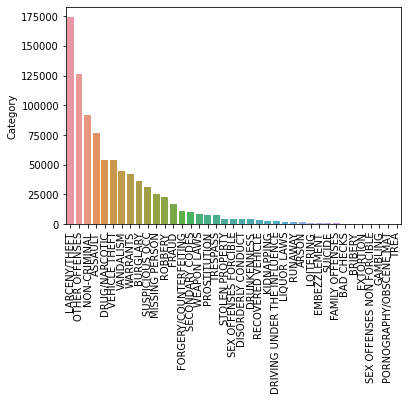

In [29]:
number_of_crimes = train_df.Category.value_counts()
_n_crime_plot = sns.barplot(x=number_of_crimes.index,y=number_of_crimes)
_n_crime_plot.set_xticklabels(number_of_crimes.index,rotation=90)


From the below plot, can clearly see which districts has most number of crimes.

[Text(0, 0, 'SOUTHERN'),
 Text(0, 0, 'MISSION'),
 Text(0, 0, 'NORTHERN'),
 Text(0, 0, 'BAYVIEW'),
 Text(0, 0, 'CENTRAL'),
 Text(0, 0, 'TENDERLOIN'),
 Text(0, 0, 'INGLESIDE'),
 Text(0, 0, 'TARAVAL'),
 Text(0, 0, 'PARK'),
 Text(0, 0, 'RICHMOND')]

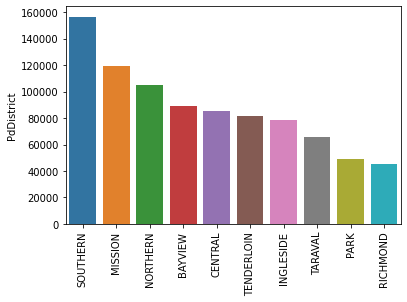

In [30]:
most_dangerous_districts = train_df.PdDistrict.value_counts()
_n_crime_plot = sns.barplot(x=most_dangerous_districts.index,y=most_dangerous_districts)
_n_crime_plot.set_xticklabels(most_dangerous_districts.index,rotation=90)



## **4. Feature Engineering and Selection**
 

1. From the 'Dates' field, extracting 4 different features which are 'Day', 'Month', 'Hour' and 'Minutes'.
1.  From the 'Month','DayOfWeek' and 'Day' field, the condition for the 'Holiday' feature is encoded to 0 if its a regular day of the week and 1 which means it includes all the holidays in the US and weekends. 
2. From the 'Month' field, we extracted the 'Season' feature. 





In [12]:

from datetime import datetime




train_df['Dates'] = pd.to_datetime(train_df['Dates'])
train_df['Year'] = train_df['Dates'].dt.year
#train_df['Dates'] = train_df['Dates'].dt.date
train_df['Month'] = train_df['Dates'].dt.month
train_df['Day'] = train_df['Dates'].dt.day
train_df['Hour'] = train_df['Dates'].dt.hour
train_df['Minutes'] = pd.to_numeric(train_df['Dates'].dt.minute)





train_df.head(5)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minutes
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30


In [13]:
from datetime import datetime




test_df['Dates'] = pd.to_datetime(test_df['Dates'])
test_df['Year'] = test_df['Dates'].dt.year
test_df['Month'] = test_df['Dates'].dt.month
test_df['Day'] = test_df['Dates'].dt.day
test_df['Hour'] = test_df['Dates'].dt.hour
test_df['Minutes'] = pd.to_numeric(test_df['Dates'].dt.minute)





test_df.head(5)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,Minutes
0,0,2015-05-10 23:59:00,6,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59
1,1,2015-05-10 23:51:00,6,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51
2,2,2015-05-10 23:50:00,6,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50
3,3,2015-05-10 23:45:00,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45
4,4,2015-05-10 23:45:00,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45


Visualizing the Crimes with respect to the hours in the day

[Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '23'),
 Text(0, 0, '13'),
 Text(0, 0, '21'),
 Text(0, 0, '14'),
 Text(0, 0, '20'),
 Text(0, 0, '0'),
 Text(0, 0, '22'),
 Text(0, 0, '15'),
 Text(0, 0, '19'),
 Text(0, 0, '16'),
 Text(0, 0, '12'),
 Text(0, 0, '17'),
 Text(0, 0, '18')]

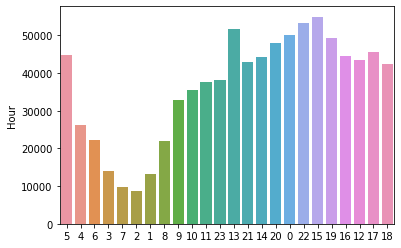

In [33]:
most_number_of_crimes_duration = train_df.Hour.value_counts().sort_values(ascending=True)
_n_crime_plot = sns.barplot(x=most_number_of_crimes_duration.index,y=most_number_of_crimes_duration)
_n_crime_plot.set_xticklabels(most_number_of_crimes_duration.index,rotation=360)

From the above graph, we can see that the highest number of crimes has occured at 3:00 pm, 9:00 pm, 12:00 am, 1:00 pm, 6:00 pm, 5:00 am etc.

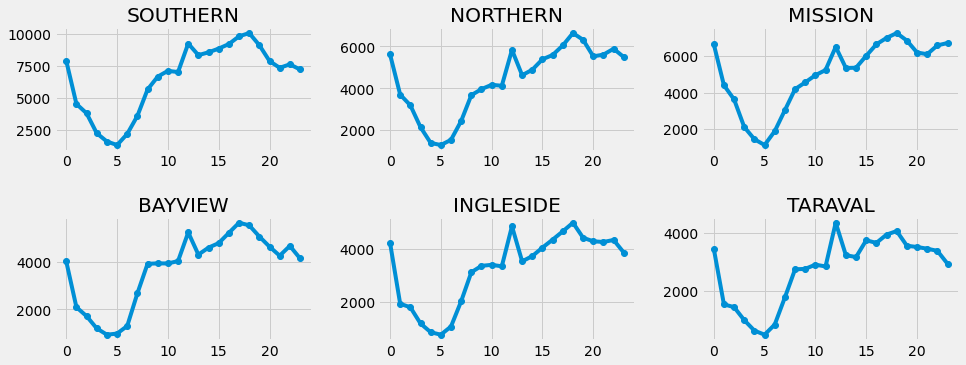

In [34]:
import pylab
pylab.rcParams['figure.figsize'] = (14.0, 8.0)

Southern = train_df[train_df['PdDistrict'] == "SOUTHERN"]
Northern = train_df[train_df['PdDistrict'] == "NORTHERN"]
Mission = train_df[train_df['PdDistrict'] == "MISSION"]
Bayview = train_df[train_df['PdDistrict'] == "BAYVIEW"]
Ingleside = train_df[train_df['PdDistrict'] == "INGLESIDE"]
Taraval = train_df[train_df['PdDistrict'] == "TARAVAL"]
Tenderloin = train_df[train_df['PdDistrict'] == "TENDERLOIN"]
Richmond = train_df[train_df['PdDistrict'] == "RICHMOND"]
Park = train_df[train_df['PdDistrict'] == "PARK"]


with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (1, 0))
    ax1.plot(Southern.groupby('Hour').size(), 'o-')
    ax1.set_title ('SOUTHERN')

    ax2 = plt.subplot2grid((3,3), (1, 1))
    ax2.plot(Northern.groupby('Hour').size(), 'o-')
    ax2.set_title ('NORTHERN')

    ax3 = plt.subplot2grid((3,3), (1, 2))
    ax3.plot(Mission.groupby('Hour').size(), 'o-')
    ax3.set_title ('MISSION')

    ax4 = plt.subplot2grid((3,3), (2, 0))
    ax4.plot(Bayview.groupby('Hour').size(), 'o-')
    ax4.set_title ('BAYVIEW')

    ax5 = plt.subplot2grid((3,3), (2, 1))
    ax5.plot(Ingleside.groupby('Hour').size(), 'o-')
    ax5.set_title ('INGLESIDE')

    ax6 = plt.subplot2grid((3,3), (2, 2))
    ax6.plot(Taraval.groupby('Hour').size(), 'o-')
    ax6.set_title ('TARAVAL')

   
    plt.tight_layout(2)
    plt.show()


From the above diagram, its evident that the number of crimes reported in southern district from 3 pm to 10 pm is significantly more. The graph helps to analyse the most number of crimes occured in which districts with respect to time.  

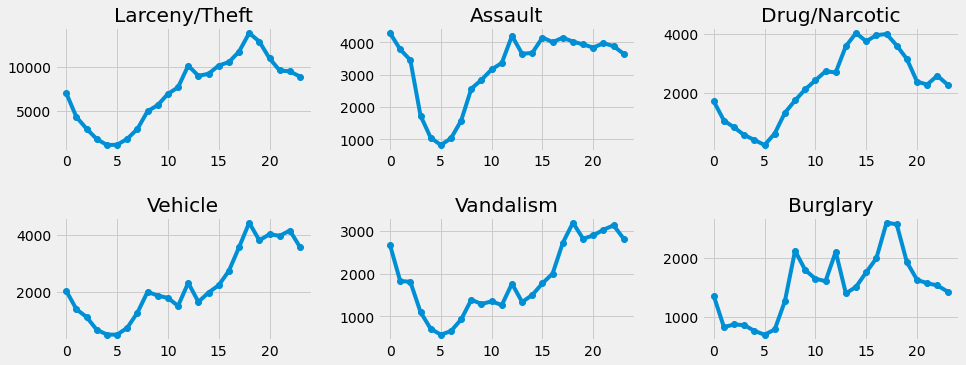

In [35]:
import pylab
pylab.rcParams['figure.figsize'] = (14.0, 8.0)

larceny = train_df[train_df['Category'] == "LARCENY/THEFT"]
assault = train_df[train_df['Category'] == "ASSAULT"]
drug = train_df[train_df['Category'] == "DRUG/NARCOTIC"]
vehicle = train_df[train_df['Category'] == "VEHICLE THEFT"]
vandalism = train_df[train_df['Category'] == "VANDALISM"]
burglary = train_df[train_df['Category'] == "BURGLARY"]
Kidnapping = train_df[train_df['Category'] == "KIDNAPPING"]
Disorderlyconduct = train_df[train_df['Category'] == "DISORDERLY CONDUCT"]
Arson = train_df[train_df['Category'] == "ARSON"]
Prostitution = train_df[train_df['Category'] == "PROSTITUTION"]
sexoff = train_df[train_df['Category'] == "SEX OFFENSES NON FORCIBLE"]
noncriminal = train_df[train_df['Category'] == "NON-CRIMINAL"]
otheroffenses = train_df[train_df['Category'] == "OTHER OFFENSES"]



with plt.style.context('fivethirtyeight'):
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('Hour').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Hour').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('Hour').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('Hour').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(vandalism.groupby('Hour').size(), 'o-')
    ax6.set_title ('Vandalism')
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('Hour').size(), 'o-')
    ax7.set_title ('Burglary')

    plt.tight_layout(2)
    plt.show()

  
  

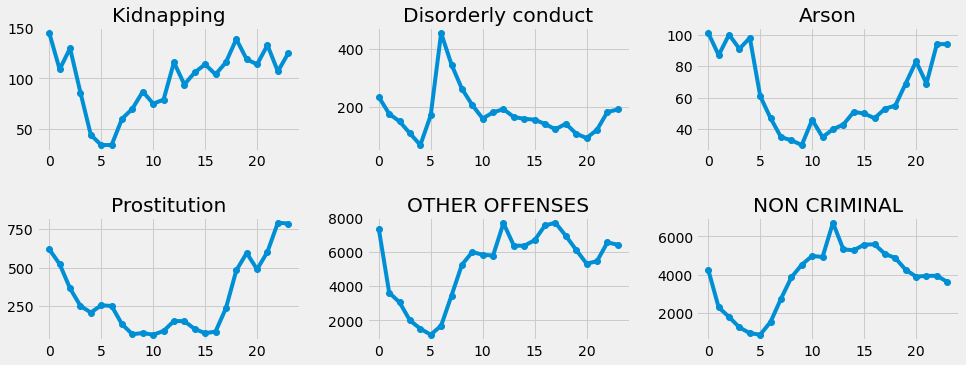

In [36]:
with plt.style.context('fivethirtyeight'):
    ax8 = plt.subplot2grid((3,3), (1, 0))
    ax8.plot(Kidnapping.groupby('Hour').size(), 'o-')
    ax8.set_title ('Kidnapping')

    ax9 = plt.subplot2grid((3,3), (1, 1))
    ax9.plot(Disorderlyconduct.groupby('Hour').size(), 'o-')
    ax9.set_title ('Disorderly conduct')

    ax10 = plt.subplot2grid((3,3), (1, 2))
    ax10.plot(Arson.groupby('Hour').size(), 'o-')
    ax10.set_title ('Arson')

    ax11 = plt.subplot2grid((3,3), (2, 0))
    ax11.plot(Prostitution.groupby('Hour').size(), 'o-')
    ax11.set_title ('Prostitution')

    ax12 = plt.subplot2grid((3,3), (2, 1))
    ax12.plot(otheroffenses.groupby('Hour').size(), 'o-')
    ax12.set_title ('OTHER OFFENSES')

    ax13 = plt.subplot2grid((3,3), (2, 2))
    ax13.plot(noncriminal.groupby('Hour').size(), 'o-')
    ax13.set_title ('NON CRIMINAL')
    



    plt.tight_layout(2)
    plt.show()

These diagrams presents the average number of incidents per hour for crimes categories. It is evident that different crimes have different frequency during different times of the day. Some examples are that prostitution picks during the evening and all through the night, Burglary picks early in the morning until the afternoon. As before these are sharp pieces of evidence that the time parameters will have a significant role also.

In [14]:
conditions = [(train_df['DayOfWeek'] == 6), (train_df['DayOfWeek'] == 7), ((train_df['Month'] == 1) & (train_df['Day'] == 1)), 
              ((train_df['Month'] == 1) &  (train_df['Day'] == 18)),
              ((train_df['Month'] == 5) & (train_df['Day'] == 31)),
              ((train_df['Month'] == 7) & (train_df['Day'] == 5)),
              ((train_df['Month'] == 9) & (train_df['Day'] == 6)),
              ((train_df['Month'] == 11) & (train_df['Day'] == 11)),
              ((train_df['Month'] == 11) & (train_df['Day'] == 25)),
              ((train_df['Month'] == 12) & (train_df['Day'] == 24)),
              ((train_df['Month'] == 12) & (train_df['Day'] == 31))


              ]
values = (1,1,1,1,1,1,1,1,1,1,1)

train_df['Holiday'] = np.select(conditions, values)
train_df.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minutes,Holiday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


Types of Seasons:

Spring, Summer, Autumn and Winter.

1. Spring - 1
2. Summer - 2
3. Autumn - 3
4. Winter - 4

In [15]:
conditions = [
              ((train_df['Month'] == 12) | (train_df['Month'] == 1) | (train_df['Month'] == 2)),
              ((train_df['Month'] == 3) |  (train_df['Month'] == 4) | (train_df['Month'] == 5)),
              ((train_df['Month'] == 6) |  (train_df['Month'] == 7) | (train_df['Month'] == 8)),
             ((train_df['Month'] == 9) |  (train_df['Month'] == 10) | (train_df['Month'] == 11))
          ]
values = (4, 1, 2, 3)

train_df['Season'] = np.select(conditions, values)
train_df.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minutes,Holiday,Season
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,1


Similarly creating the new features Holiday and Season for testing dataset

In [16]:
conditions = [(test_df['DayOfWeek'] == 6), (test_df['DayOfWeek'] == 7), ((test_df['Month'] == 1) & (test_df['Day'] == 1)), 
              ((test_df['Month'] == 1) &  (test_df['Day'] == 18)),
              ((test_df['Month'] == 5) & (test_df['Day'] == 31)),
              ((test_df['Month'] == 7) & (test_df['Day'] == 5)),
              ((test_df['Month'] == 9) & (test_df['Day'] == 6)),
              ((test_df['Month'] == 11) & (test_df['Day'] == 11)),
              ((test_df['Month'] == 11) & (test_df['Day'] == 25)),
              ((test_df['Month'] == 12) & (test_df['Day'] == 24)),
              ((test_df['Month'] == 12) & (test_df['Day'] == 31))


              ]
values = (1,1,1,1,1,1,1,1,1,1,1)

test_df['Holiday'] = np.select(conditions, values)



conditions = [
              ((test_df['Month'] == 12) | (test_df['Month'] == 1) | (test_df['Month'] == 2)),
              ((test_df['Month'] == 3) |  (test_df['Month'] == 4) | (test_df['Month'] == 5)),
              ((test_df['Month'] == 6) |  (test_df['Month'] == 7) | (test_df['Month'] == 8)),
             ((test_df['Month'] == 9) |  (test_df['Month'] == 10) | (test_df['Month'] == 11))
          ]
values = (4, 1, 2, 3)

test_df['Season'] = np.select(conditions, values)
test_df.head(5)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,Minutes,Holiday,Season
0,0,2015-05-10 23:59:00,6,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,1,1
1,1,2015-05-10 23:51:00,6,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,1,1
2,2,2015-05-10 23:50:00,6,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,1,1
3,3,2015-05-10 23:45:00,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,1,1
4,4,2015-05-10 23:45:00,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,1,1


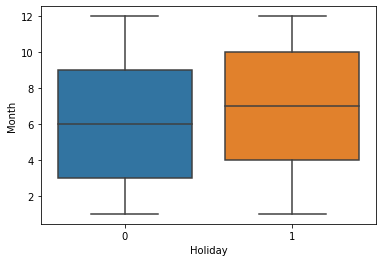

In [17]:
sns.boxplot(x=train_df['Holiday'],y=train_df['Month'],data=train_df);

In [18]:
le1 = LabelEncoder()
train_df['PdDistrict'] = le1.fit_transform(train_df['PdDistrict'])
test_df['PdDistrict'] = le1.transform(test_df['PdDistrict'])



train_df.head(5)



,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minutes,Holiday,Season
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,4,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,4,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,4,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,4,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,5,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,1


Removing the duplicate columns

In [19]:
train_df.drop('Dates',axis=1,inplace=True)
#train_df=pd.concat([train_df,pd.get_dummies(train_df['PdDistrict'])],axis=1)
train_df.drop(['Resolution'],axis=1,inplace=True)

#train_df.drop(['X'],axis=1,inplace=True)
#train_df.drop(['Y'],axis=1,inplace=True)
#train_df.drop(['Minutes'],axis=1,inplace=True)

train_df.drop('Descript',axis=1,inplace=True)
train_df.drop('Address',axis=1,inplace=True)

train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 875726 entries, 0 to 878048
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    875726 non-null  object 
 1   DayOfWeek   875726 non-null  int64  
 2   PdDistrict  875726 non-null  int64  
 3   X           875726 non-null  float64
 4   Y           875726 non-null  float64
 5   Year        875726 non-null  int64  
 6   Month       875726 non-null  int64  
 7   Day         875726 non-null  int64  
 8   Hour        875726 non-null  int64  
 9   Minutes     875726 non-null  int64  
 10  Holiday     875726 non-null  int64  
 11  Season      875726 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 126.9+ MB


In [20]:
train_df.head()

,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Day,Hour,Minutes,Holiday,Season
0,WARRANTS,2,4,-122.425892,37.774599,2015,5,13,23,53,0,1
1,OTHER OFFENSES,2,4,-122.425892,37.774599,2015,5,13,23,53,0,1
2,OTHER OFFENSES,2,4,-122.424363,37.800414,2015,5,13,23,33,0,1
3,LARCENY/THEFT,2,4,-122.426995,37.800873,2015,5,13,23,30,0,1
4,LARCENY/THEFT,2,5,-122.438738,37.771541,2015,5,13,23,30,0,1


In [21]:
test_df.drop('Dates',axis=1,inplace=True)
#test_df=pd.concat([test_df,pd.get_dummies(test_df['PdDistrict'])],axis=1)
#test_df.drop('PdDistrict',axis=1,inplace=True)
test_df.drop('Address',axis=1,inplace=True)
test_df.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   DayOfWeek   884262 non-null  int64  
 2   PdDistrict  884262 non-null  int64  
 3   X           884262 non-null  float64
 4   Y           884262 non-null  float64
 5   Year        884262 non-null  int64  
 6   Month       884262 non-null  int64  
 7   Day         884262 non-null  int64  
 8   Hour        884262 non-null  int64  
 9   Minutes     884262 non-null  int64  
 10  Holiday     884262 non-null  int64  
 11  Season      884262 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 81.0 MB


In [22]:
train_df.head()

,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Day,Hour,Minutes,Holiday,Season
0,WARRANTS,2,4,-122.425892,37.774599,2015,5,13,23,53,0,1
1,OTHER OFFENSES,2,4,-122.425892,37.774599,2015,5,13,23,53,0,1
2,OTHER OFFENSES,2,4,-122.424363,37.800414,2015,5,13,23,33,0,1
3,LARCENY/THEFT,2,4,-122.426995,37.800873,2015,5,13,23,30,0,1
4,LARCENY/THEFT,2,5,-122.438738,37.771541,2015,5,13,23,30,0,1


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs



le2 = LabelEncoder()
X = train_df.drop(columns=['Category'])
y = le2.fit_transform(train_df['Category'])


clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
X, y = make_blobs(random_state=42,
                  cluster_std=15.0, n_features = 12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            min_samples_leaf=1, min_samples_split=2,
            n_estimators=100, n_jobs=1
            )

#train_df.head(5)
feature_imp = pd.Series(clf.feature_importances_,index=train_df.columns).sort_values(ascending=False)
feature_imp


Holiday       0.159079
Minutes       0.144892
DayOfWeek     0.116214
PdDistrict    0.082785
Season        0.074026
Year          0.068518
Month         0.067946
Hour          0.066967
Day           0.066604
X             0.060824
Y             0.050027
Category      0.042117
dtype: float64

No handles with labels found to put in legend.


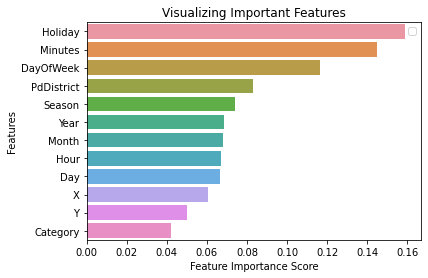

In [25]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [48]:
print(test_df.columns)

Index(['Id', 'DayOfWeek', 'PdDistrict', 'X', 'Y', 'Year', 'Month', 'Day',
       'Hour', 'Minutes', 'Holiday', 'Season'],
      dtype='object')


In [49]:
print(train_df['Category'])

0                       WARRANTS
1                 OTHER OFFENSES
2                 OTHER OFFENSES
3                  LARCENY/THEFT
4                  LARCENY/THEFT
                   ...          
878044                   ROBBERY
878045             LARCENY/THEFT
878046             LARCENY/THEFT
878047                 VANDALISM
878048    FORGERY/COUNTERFEITING
Name: Category, Length: 875726, dtype: object


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875726 entries, 0 to 878048
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    875726 non-null  object 
 1   DayOfWeek   875726 non-null  int64  
 2   PdDistrict  875726 non-null  int64  
 3   X           875726 non-null  float64
 4   Y           875726 non-null  float64
 5   Year        875726 non-null  int64  
 6   Month       875726 non-null  int64  
 7   Day         875726 non-null  int64  
 8   Hour        875726 non-null  int64  
 9   Minutes     875726 non-null  int64  
 10  Holiday     875726 non-null  int64  
 11  Season      875726 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 126.9+ MB


In [51]:
train_df['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

## **5. Multiple Optimised models**

**Logarithmic loss** 

It measures the performance of a classification model where the prediction output is a probability value between 0 and 1. For each incident, we will predict a set of predicted probabilities (one for every class), and we will calculate the average deviation from the real values.
 


*   A perfect classifier would have a log loss of precisely zero, less ideal classifier have progressively larger values of log loss.
*   In order to calculate log loss the classifier must assign a probability to each class.





**Boosting:**

It is an ensemble earning method that combines a set of weak learners into strong learners to minimize the training error. Each trying to correct its predecessor.

**Gradient Boosting Classifier:**


*   Learning happens by optimizing the loss function like MSE, RSE, Logloss etc.
*   Gradient Boosting Classifier uses the gradient(loss) of model as a input to the next model and goes on.
*   By default we use decision tree as base estimator




**Hyperparameters:**


1.  Learning rate: [0-1] Controls the magnitude of change meaning how much change is required in each DT. 
2.   Number of estimators: Number of decision trees to be used.
3.   Subsample: Denotes the number of sections/fractions of records will be selected for RM1, RMS etc. (0.8 meaning 8000 observations will go to DT)
4.   max_depth: The maximum depth limits the number of nodes in the tree.










In [34]:
np.random.seed(0)
from sklearn.metrics import log_loss
from sklearn import metrics

le2 = LabelEncoder()
X = train_df.drop(columns=['Category'])
y = le2.fit_transform(train_df['Category'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test



In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn import metrics



gradient_booster = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, subsample = 0.5)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 0.5,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [49]:
gb = gradient_booster.fit(X_train, y_train)
gb_probs = gb.predict_proba(X_test)
score = log_loss(y_test, gb_probs, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39])
print(score)

5.7617746664083365


**Random Forest Classifier:**

It fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


*  Random Forest is a ensemble learning method for classification and Regression.
A random forest combines several decision trees. DT = [Decision Tree]

* Dataset -> [DT-1] -> [DT-2] -> [DT-3] 

* result -> [DT-1] -> [DT-2] -> [DT-3]

* Major voting Averaging 

* Final Result








In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100,bootstrap=True,
            max_depth=3, max_leaf_nodes=20, max_features='auto' )
clf.fit(X_train, y_train)
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39])
print(score)

4.992496297016066


In [54]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)


(700580, 11)
(700580,)
(175146, 11)
(175146,)


(None, None)

In [55]:
print(X_train),print(y_train)



        DayOfWeek  PdDistrict           X  ...  Minutes  Holiday  Season
191573          0           6 -122.483664  ...       39        0       3
411496          2           4 -122.434362  ...       50        0       2
425577          4           4 -122.441854  ...        0        0       1
798379          6           1 -122.417368  ...        0        1       4
861697          3           4 -122.428950  ...        0        0       1
...           ...         ...         ...  ...      ...      ...     ...
360688          5           4 -122.429042  ...       30        0       1
152717          5           3 -122.406725  ...       40        0       1
118275          1           7 -122.414318  ...       54        0       3
436967          3           1 -122.407925  ...        0        0       1
306467          3           8 -122.466987  ...       30        0       4

[700580 rows x 11 columns]
[21 24 27 ... 37 35  4]


(None, None)

In [56]:
print(X_test)




        DayOfWeek  PdDistrict           X  ...  Minutes  Holiday  Season
651143          0           7 -122.401817  ...        0        0       4
813283          2           5 -122.437990  ...        0        0       3
425130          5           9 -122.414850  ...       57        0       1
310342          6           2 -122.429603  ...       28        1       4
683140          3           0 -122.394439  ...       25        0       3
...           ...         ...         ...  ...      ...      ...     ...
379658          1           0 -122.386190  ...        0        0       4
607146          1           5 -122.439142  ...       10        0       3
534753          0           2 -122.400269  ...        0        0       3
564972          5           7 -122.403405  ...       50        0       1
824337          4           3 -122.410670  ...        0        0       3

[175146 rows x 11 columns]


In [57]:
print(y_test)

[32 37 25 ... 35 35 36]


In [58]:
print(clf_probs)


[[0.00110186 0.06981767 0.00101347 ... 0.06938621 0.02554362 0.00469407]
 [0.00125462 0.06971213 0.00097986 ... 0.10287856 0.02558591 0.00534002]
 [0.00144706 0.09978723 0.00025051 ... 0.02084189 0.07976942 0.01033898]
 ...
 [0.00157263 0.08090646 0.0008206  ... 0.09470506 0.02448178 0.00661728]
 [0.00177541 0.09299225 0.00026394 ... 0.04336193 0.05957018 0.0116954 ]
 [0.00154452 0.07921644 0.00091746 ... 0.11412183 0.02651058 0.00688944]]


LightGBM (Light Gradient Boosted Machine)

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.

The random_state parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

This is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.





1. Lgbm gbdt: It is the default type of boosting.
2. objective: The concrete objective used while fitting this model, Set it binary or multiclass.
3. num_class:	Used only in multi-class classification application
4. metrics:	Multilogloss or Binary_logloss or AUC or etc.
5. early_stopping_rounds: 
This parameter will stop training if the validation metric is not improving after the last early stopping round. That should be defined in pair with a number of iterations. If you set it too large you increase the chance of overfitting (but your model can be better).
The rule of thumb is to have it at 10% of your num_iterations.
6. boosting_type (str, optional (default='gbdt')) – ‘gbdt’, traditional Gradient Boosting Decision Tree. ‘rf’, Random Forest.
7. num_leaves (int, optional (default=31)) – Maximum tree leaves for base learners.
8. max_depth (int, optional (default=-1)) – Maximum tree depth for base learners, <=0 means no limit.
9. learning_rate (float, optional (default=0.1)) – Boosting learning rate. Controls the magnitude of change meaning how much change is required in each DT.
10. n_estimators (int, optional (default=100)) – Number of boosted trees to fit.
11. subsample_for_bin (int, optional (default=200000)) – Number of samples for constructing bins.
12. colsample_bytree (float, optional (default=1.)) – Subsample ratio of columns when constructing each tree.
13. reg_alpha (float, optional (default=0.)) – L1 regularization term on weights.
14. subsample (float, optional (default=1.)) – Subsample ratio of the training instance.
15. min_child_samples (int, optional (default=20)) – Minimum number of data needed in a child (leaf).


In [40]:

import time
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
start = time.time()
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import lightgbm as lgb

model=lgb.LGBMClassifier(objective ='multiclass', boosting_type= 'gbdt')
parameters = {'num_leaves':[10,20,40,60,80,100,200,300,400], 'min_child_samples':[10,20,30,40,50,80,100,150,200,250],'max_depth':[2,3,4,6,8,10,20],
             'learning_rate':[0.025,0.05,0.1,0.2,0.3,0.4,0.5],'reg_alpha':[0,0.01,0.03,0.2,0.3,0.4,0.5], 'n_estimators': [100,200,300,400,600],
           'subsample':[0.1,0.2,0.4,0.5,0.6,0.8,0.9], 'colsample_bytree': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], 'max_bin' : [78,160,190,200,370,400,465,500]}
log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
clf=RandomizedSearchCV(model,parameters,scoring=log_loss,n_iter=100)
X, y = make_blobs(random_state=42,
                  cluster_std=15.0, n_features = 12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test
clf.fit(X_train,y_train)
print(clf.best_params_)
predicted=clf.predict(X_test)

print('Classification of the result is:')
print(accuracy_score(y_test, predicted))
end = time.time()
print('Execution time is:')
print(end - start)


{'subsample': 0.6, 'reg_alpha': 0.3, 'num_leaves': 60, 'n_estimators': 200, 'min_child_samples': 20, 'max_depth': 10, 'max_bin': 190, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
Classification of the result is:
0.75
Execution time is:
12.45103931427002


In [60]:
# Creating the model
import lightgbm as lgb
train_data = lgb.Dataset(
    X, label=y,free_raw_data=False)


params = {'boosting':'gbdt',
          'objective':'multiclass',
          'num_class':39,
          'subsample': 0.6, 'num_leaves': 60, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.1, 'reg_alpha': 0.3 
          }


bst = lgb.train(params, train_data, 100)

predictions = bst.predict(test_df)
cv_results = lgb.cv(params, train_data, metrics='multi_logloss')
print('Best score: ', min(cv_results['multi_logloss-mean']))



Best score:  2.3275857855742728


In [61]:

submission = pd.DataFrame(predictions,
                          columns=le2.classes_,
                          index=test_df.index)
submission.to_csv('LGBM_new_Samplehypertuning_Submission_1.csv', index_label='Id')

## **6. Interpretability and Reports**

**ELI5** is a Python package which helps to debug machine learning classifiers and explain their predictions.
By default, ‘gain’ is used, that is the average gain of the feature when it is used in trees.

In [80]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import eli5
from eli5.sklearn import PermutationImportance


le2 = LabelEncoder()
X = train_df.drop(columns=['Category'])
y = le2.fit_transform(train_df['Category'])

#'subsample': 0.6, 'num_leaves': 60, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.1, 'reg_alpha': 0.3 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
model =LGBMClassifier(objective='multiclass', num_class=39, subsample=0.6, num_leaves=60,min_child_samples=20,max_depth=10,learning_rate=0.1,colsample_bytree=0.1,reg_alpha=0.3, max_bin = 190).fit(X_train, y_train)

perm = PermutationImportance(model).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0334 ± 0.0013,Minutes
0.0198 ± 0.0007,Y
0.0157 ± 0.0007,X
0.0075 ± 0.0008,PdDistrict
0.0036 ± 0.0007,Year
0.0030 ± 0.0008,Hour
0.0004 ± 0.0002,DayOfWeek
0.0001 ± 0.0001,Holiday
0.0001 ± 0.0002,Day
0.0000 ± 0.0003,Month


Based on the Permutation Importance analysis we performed before, the model should be susceptible to changes in Minute and the coordinates and less sensitive to changes in Day, Year, Holiday or Day of the week.
The Permutation importance is a great tool to understand how much a specific feature affect our prediction.
The value tells us how much of an impact a feature has on the predictions on average, the sign tells us in which direction.


**SHAP**

An interesting visualization would be to depict how each feature affects a specific prediction. Insights like this are possible with the use of the SHAP library.

SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. 
Group of co-operating members that work together to produce some value v, called the coalition value.We have a coalition 'c' that collaborates to produce value 'v'. SHAP helps to determine the average amount of contribution that a particular memeber makes to the coalition value.


Contribution of each feature values to the difference between the given prediction and the average prediction.

The red indicates it increases the probability of the outcome more and blue indicates that their contribution for certain probability is less.   



In [71]:
data_for_prediction = test_df.loc[[60000]]
data_for_prediction

,Id,DayOfWeek,PdDistrict,X,Y,Year,Month,Day,Hour,Minutes,Holiday,Season
60000,60000,4,5,-122.444528,37.778881,2014,8,1,2,49,0,2


In [104]:
import shap
shap.initjs()


clf = RandomForestClassifier(n_estimators=100,bootstrap=True,
            max_depth=3, max_leaf_nodes=20, max_features='auto')
model = clf.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.force_plot(explainer.expected_value[4], shap_values[4], data_for_prediction, link='logit')

In [103]:
import shap
import lightgbm as lgb

shap.initjs()
# #min_data_in_leaf=21,
#           learning_rate = 0.4,
#           max_bin = 465,
#           num_leaves=41
clf = lgb.LGBMClassifier(objective='multiclass', num_class=39,subsample=0.6, num_leaves=60,min_child_samples=20,max_depth=10,learning_rate=0.1,colsample_bytree=0.1,reg_alpha=0.3)
                      
model = clf.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction, link='logit')


Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

### **Summary**

---






**1**. **Importing the necessary libraries and dataset**

**2.** **Data Preprocessing**

    * Checking for null values:
      No null values were encountered.
    * Checking for duplicates:
      Dropping the duplicate rows.
    * Describing the dataset.
      Analysing stats like mean, count etc.
    * Encoding DaysOfWeek

**3.** **Data Visualization and Exploration**

    * Counting and sorting the values for the column 'Category'. These are the classes which are categories of crime and there are 39 types of crime.
    * Plotting a graph to see which districts has most number of crimes.
    * Plotting a graph to analyse the most number of crimes occurred in districts with respect to time.
    * Plotting a graph to visualize the crimes that has occurred most time with respect to the hours in the day.
    * Plotting a graph that presents the average number of incidents per hour for crimes categories. 

**4.** **Feature Engineering and selection**

  * From the 'Dates' field, extracted 4 new features that are 'Month' , 'Day', 'Hour' and 'Minutes'.
  * From the 'Month' field, extracted a new feature 'Season'.
  * From 'DayOfWeek', 'Month' and 'Days' field, extracted new feature called 'Holidays'.


  * **Feature Selection:**

     The feature selection is done by using Random Forest Classifier.
Random forests consist of decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived from how “pure” each of the buckets is.


      
      
      
   1. For classification, the measure of impurity is either the Gini impurity or   the information gain/entropy.


*   **Impurity**:   Measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.
*   **Gini Impurity**:  It tells us what is the probability of misclassifying an observation.
*  **Entropy**:   Measures the uncertainity of an event occurring.

     Entropy would be highest = when you are most uncertain.
     Entropy would be lowest = when you are certain about outcome.

2. When the entropy score is decreased that means it is increased in certainty, this difference is called Information gain.


          Gain(T,X) = Entropy(T) — Entropy(T,X)
          T = target variable
          X = Feature to be split on
          Entropy(T,X) = The entropy calculated after the data is split on feature X

* Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

* We can summarize that features like Holiday, Minutes, DayOfWeek, Day, Hour, Season, PdDistrict, Month and the Year has higher feature importance score.

**5.** **Multiple Model Optimisation:** 

 There are 3 types of models used for optimisation. 
 * Random Forest Classifier
 * Gradient Boosting Classifier
 * Lightgbm 

**6.** **Interpretability and Reports**

   To find out ways to understand model decision making policies better, we use 2 methods which are Eli5 and Shapley Values.


1. Eli5 (Explain Like I'm 5)
*  Global Interpretation : Inspect model parameters and try to figure out how the model works globally. 
*   For tree-based models, It simply uses the GINI index used for preparing decision trees as weights.

2. SHAP(SHapley Additive exPlanations)

*   Shapley values measure how much an individual player contributes to a game. For this, we look at each coalition of players and which outcome they achieve
*   Helps us determine which features matters the most given the difference between given prediction and average prediction.









  

















## **Conclusion**

```
Log loss for the models used:

Gradient Boosting Classifier = 5.76
Random Forest Classifier = 4.99
Light gbm classifier = 2.32

```

Light gbm is the highest performance gradient boosting algorithm which has the lowest log loss and helps to predict the category of crimes that occured in the city by the bay more accurately.


## **Contributions**

1. Creating two new columns which are different from public kernels.
2. Fitting different model like Gradient Boosting,Random Forest classifier and Lightgbm.
3. Hyperparameter tuning using RandomizedSearchCV for better results.
 


## **References and Citations**





1. https://www.kaggle.com/robineast/log-loss-example
2. https://www.kaggle.com/yannisp/sf-crime-analysis-prediction
3. https://www.kaggle.com/shivangi21/crime-visualization
4. https://coderzcolumn.com/tutorials/machine-learning/lightgbm-an-in-depth-guide-python
5. https://www.kaggle.com/cast42/lightgbm-model-explained-by-shap
6. https://www.datacamp.com/community/tutorials/random-forests-classifier-python
7. https://github.com/TeamHG-Memex/eli5
8. https://towardsdatascience.com/explainable-artificial-intelligence-part-3-hands-on-machine-learning-model-interpretation-e8ebe5afc608
9. https://learn-scikit.oneoffcoder.com/shap.html
10. https://www.kaggle.com/vbookshelf/sklearn-lightgbm
11. https://www.kaggle.com/mrbeer/benchmarks-and-multi-log-loss-function
12. https://www.kaggle.com/ganeshjshetty/san-francisco-crime-classification


## **License**

Copyright 2021, Pannaga Veeramohan

Licensed under the Apache License, Version 2.0 (the "License"),
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.